In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load the Dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [3]:
# Exploratory Data Analysis (EDA)
# Basic info
print(df.head())
print(df.describe())
print(df.info())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    

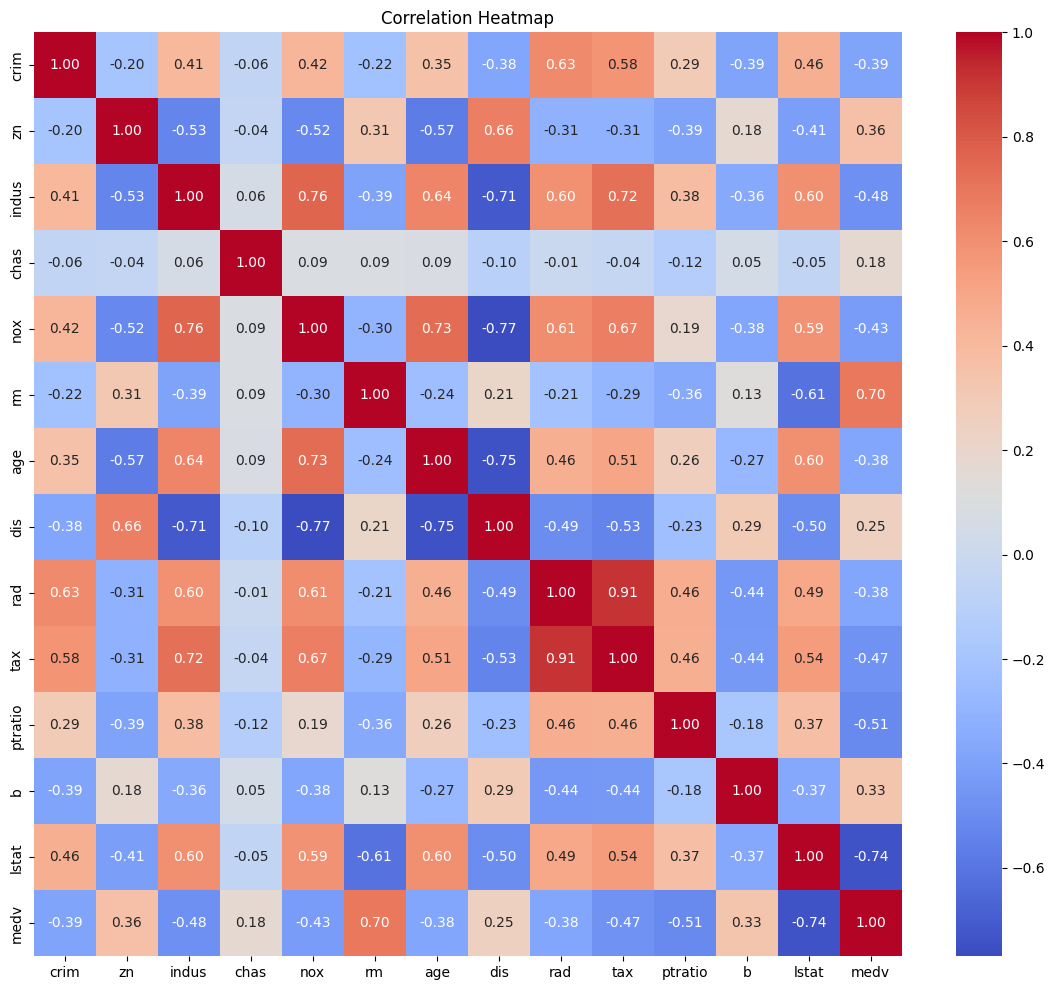

In [4]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# Simple Linear Regression (Using RM)
# Feature and target
X = df[['rm']]
y = df['medv']

In [6]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict
y_pred = lr.predict(X_test)

In [9]:
# Evaluate
print("Simple Linear Regression:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Simple Linear Regression:
R²: 0.3707569232254778
MAE: 4.478335832064149
RMSE: 6.792994578778734


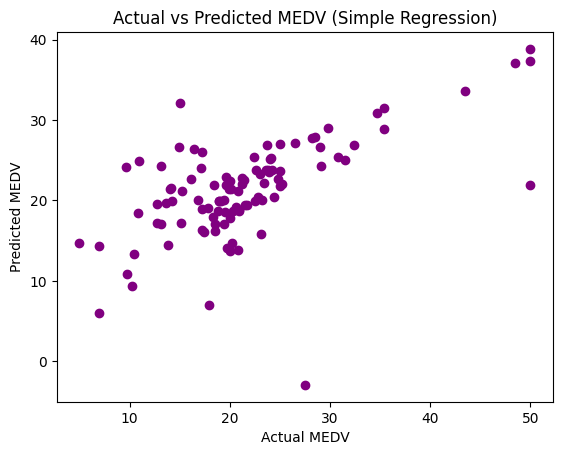

In [10]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV (Simple Regression)")
plt.show()

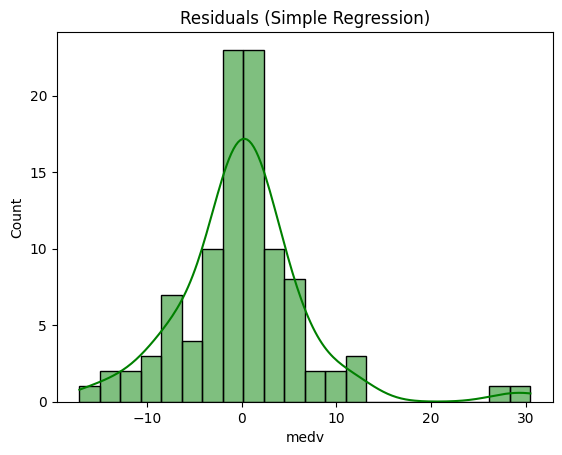

In [11]:
# Residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='green')
plt.title("Residuals (Simple Regression)")
plt.show()

In [12]:
# Get top 5 correlated features with MEDV
corr_matrix = df.corr()
top_features = corr_matrix['medv'].abs().sort_values(ascending=False)[1:6].index.tolist()
print("Top 5 correlated features:", top_features)

Top 5 correlated features: ['lstat', 'rm', 'ptratio', 'indus', 'tax']


In [13]:
X = df[top_features]
y = df['medv']

In [14]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict
y_pred_mlr = mlr.predict(X_test)

In [17]:
# Metrics
print("\nMultiple Linear Regression:")
print("R²:", r2_score(y_test, y_pred_mlr))
print("MAE:", mean_absolute_error(y_test, y_pred_mlr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlr)))


Multiple Linear Regression:
R²: 0.6196683547405641
MAE: 3.3357265551811968
RMSE: 5.281208043853636


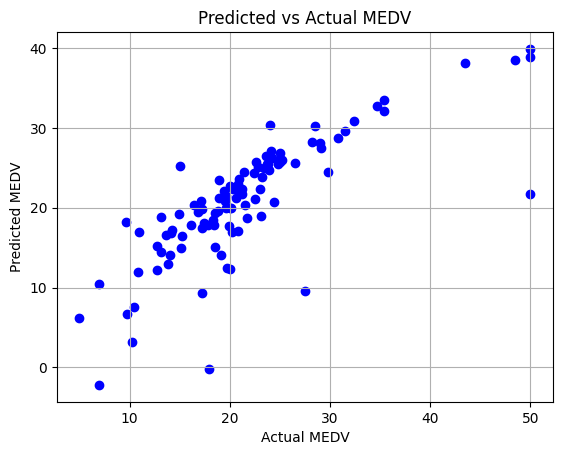

In [18]:
# Predicted vs Actual
plt.scatter(y_test, y_pred_mlr, color='blue')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Predicted vs Actual MEDV")
plt.grid(True)
plt.show()

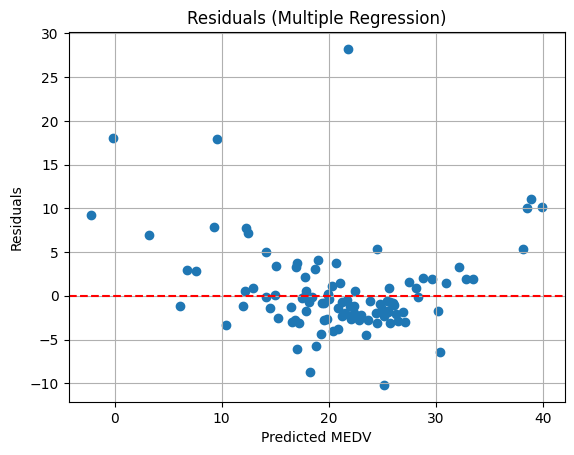

In [19]:
# Residuals
residuals = y_test - y_pred_mlr
plt.scatter(y_pred_mlr, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Residuals (Multiple Regression)")
plt.grid(True)
plt.show()